# Position group weight evolution

In [3]:
import pandas as pd
import numpy as np
import glob

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import csaps


sns.set(style="whitegrid", 
        palette="pastel", 
        font='Circular Spotify Text', 
        font_scale = 1.1, 
        rc= {'grid.color': '.95', 'xtick.color': '.3', 'ytick.color': '.3'})


In [8]:
df = pd.concat(map(pd.read_csv, glob.glob('../data/player-data/*.csv')), sort=False)

In [6]:
df.columns

Index(['Unnamed: 0', 'birthDate', 'collegeId', 'collegeName', 'displayName',
       'esbId', 'firstName', 'gsisId', 'height', 'homeTown', 'jerseyNumber',
       'lastName', 'middleName', 'nflId', 'position', 'positionGroup',
       'season', 'status', 'suffix', 'teamAbbr', 'teamFullName', 'teamId',
       'teamSeq', 'weight', 'yearsOfExperience'],
      dtype='object')

In [19]:
df.loc[df['positionGroup'] == 'DL'].groupby('season')['weight'].mean().reset_index().head()

,season,weight
0,1970,255.878453
1,1971,255.830601
2,1972,255.994536
3,1973,255.072222
4,1974,255.217617


In [81]:
#positions = df['positionGroup'].unique().tolist()
positions = ['OL', 'DL']
years = df['season'].unique().tolist()

In [87]:
data = df.loc[df['weight'] > 0].groupby(['season', 'positionGroup'])['weight'].mean().reset_index()

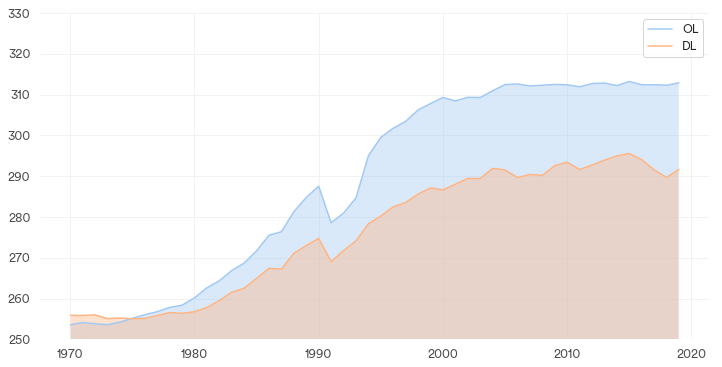

In [88]:
f, ax = plt.subplots(figsize=(12, 6))

for position in positions:

    x = data.loc[data['positionGroup'] == position, 'season'].values
    y = data.loc[data['positionGroup'] == position, 'weight'].values

    sp = csaps.UnivariateCubicSmoothingSpline(x, y, smooth=.9)

    xs = np.linspace(x[0], x[-1], 150)
    ys = sp(xs)


    ax = sns.lineplot(x=x, y=y, lw=1.5, label=position)
    ax.set_ylim(250, 330)

    plt.fill_between(x, y, 0, alpha=0.4)

    sns.despine(left=True, right=True, bottom=True, top=True)

    filename = 'test'

    plt.savefig('output/' + filename + '.svg', format='svg', dpi=300, bbox_inches='tight')


In [73]:
data.loc[data['positionGroup'] == 'DL']

,season,positionGroup,weight
1,1970,DL,255.878453
10,1971,DL,255.830601
19,1972,DL,255.994536
28,1973,DL,255.072222
37,1974,DL,255.217617
46,1975,DL,255.039773
55,1976,DL,255.117347
64,1977,DL,255.831579
73,1978,DL,256.561224
82,1979,DL,256.368159
